In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import isoweek  

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data = "monthly_in_situ_co2_mlo.csv"
# Vérifier si le fichier local existe, et s'il n'existe pas, le télécharger depuis l'URL
import os
import urllib.request

# Vérifier si le fichier local n'existe pas
if not os.path.exists(data):
    # Télécharger les données depuis l'URL et les enregistrer dans le fichier local
    urllib.request.urlretrieve(data_url, data)
    

In [5]:
 # Lire les données depuis le fichier local CSV en sautant la première ligne (commentaire)
raw_data = pd.read_csv(data, skiprows=57)

# Afficher les données brutes
raw_data
 # Sélectionner les lignes contenant au moins une valeur manquante (NaN)
raw_data[raw_data.isnull().any(axis=1)]
 # Supprimer les lignes contenant des valeurs manquantes (NaN) à partir des données brutes
data = raw_data.dropna().copy()

# Afficher les données nettoyées (sans valeurs manquantes) et en créer une copie
data
data = data.dropna(subset=['     CO2'])
print(data.columns)

Index(['  Yr', ' Mn', '    Date', '      Date', '     CO2', 'seasonally',
       '        fit', '  seasonally', '      CO2', ' seasonally', ' Sta'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


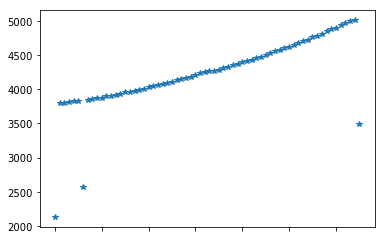

In [6]:
# Grouper par année (Yr) et sommer les valeurs de CO2
annees = data['  Yr'].unique()  # Obtenir la liste des années uniques

# Initialiser les listes pour stocker les années et les émissions de CO2 annuelles
year = []  # Liste des années
yearly_CO2 = []  # Liste des émissions annuelles de CO2

for annee in annees:
    # Filtrer les données pour l'année spécifique
    donnees_annee = data[data['  Yr'] == annee]
    
    # Somme des émissions de CO2 pour l'année spécifique
    donnees_annee['     CO2'] = donnees_annee['     CO2'].astype(float)
    somme_co2_annee = donnees_annee['     CO2'].sum()
    
    # Ajouter l'année et la somme des émissions à leurs listes respectives
    year.append(annee)
    yearly_CO2.append(somme_co2_annee)

# Créer une série pandas avec les données annuelles et les années comme index
yearly_CO2 = pd.Series(data=yearly_CO2, index=year)
# Tracer un graphique de dispersion des données d'incidence annuelle avec un style en étoile
yearly_CO2.plot(style='*')